<a href="https://colab.research.google.com/github/hasanj0n/Data_Science/blob/main/diabet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Vazifa
Quyidagi ma'lumotlar to'plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. **Maqsad diagnostik o'lchovlar asosida bemorda diabet bor-yo'qligini taxmin qilishdir.**

Tarkib
Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.

Ustunlar
* Pregnancies: homilador bo'lish soni
* Glucose: glyukozaga test natijasi
* BloodPressure: diastolik qon bosimi (mm Hg)
* SkinThickness: Triceps teri burmasining qalinligi (mm)
* Insulin: 2 soatlik sarum insulini (mu U/ml)
* BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)
* DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
* Age: Yosh (yil)

*Outcome: Class (0 - diabet yo'q, 1 - diabet)*

### Kerakli kutubxonalarni import qilib olamiz

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Malumotlarni yuklab olamiz

In [79]:
df = pd.read_csv("https://raw.githubusercontent.com/hasanj0n/Datasets/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Dataset haqida umumiy malumotlarga ega bo'lamiz

In [80]:
df.shape

(768, 9)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [82]:
# nan qiymatlar soni
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [83]:
# statistik ma'lumotlar
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Malumotlarni tozalash

**Sorry.** Menda meditsinaga oid bilimlar yo'q. Shuning uchun malumotlarda noodatiy qiymatlar haqida hech narsa deya olmayman.

Lekin BMI ustuni 0 ga teng bo'lmasligi shart.

Chunki:

![img](https://cdn.numerade.com/ask_images/c296d758696e4920bedcf0e7e748abe1.jpg?_gl=1*we1c6*_ga*MjE0MDUzMzg3OC4xNjg4ODIwNTQ3*_ga_K0NSFP2V8T*MTY4ODgyMDU0Ny4xLjAuMTY4ODgyMDU0Ny42MC4wLjA.) ![link text](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiwJ0m1SE4W_Mu2vinGFjifxfMfop0HFarDnCXbgBsLtRN5wYDQkIybQQEFHNptjmZwy6wZqF7uWhCCJx3HR0y4CmaiUOLojQQ1iKoJU-a2b7yio0F0mYMzEcR2CKGuM6897BTu1pt62P9RdEoBEJ-j91gbU9ZuoUHgUom0yIDBnYDQUwdsLdnWjEbNJg/s1632/how%20to%20calculate%20bmi.webp)


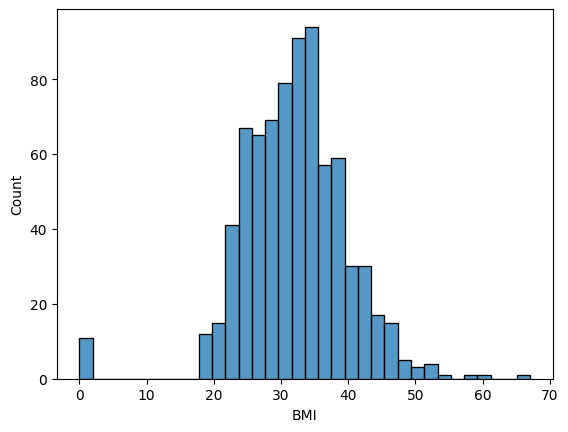

In [84]:
sns.histplot(df, x="BMI")
plt.show()

Mana ko'rishimiz mumkinki bizda bitta noodatiy qiymat bor

In [85]:
# Mana usha qiymatlarga ega ustunlar
df[df.BMI<10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [86]:
# bu ustunlarni tashlab yuboramiz
df.drop(df[df.BMI<10].index, inplace=True)

In [87]:
# takrorlangan qiymatlar borligini tekshiramiz
df.duplicated().sum()

0

### Vizulazation

In [88]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127176,0.153660,-0.078353,-0.072941,0.021719,-0.026586,0.547046,0.216472
Glucose,0.127176,1.000000,0.134615,0.049609,0.328716,0.219290,0.134286,0.258243,0.465906
BloodPressure,0.153660,0.134615,1.000000,0.181390,0.073019,0.194328,0.020758,0.225494,0.052585
SkinThickness,-0.078353,0.049609,0.181390,1.000000,0.431953,0.384586,0.178053,-0.117089,0.072072
Insulin,-0.072941,0.328716,0.073019,0.431953,1.000000,0.185357,0.182980,-0.044188,0.128888
BMI,0.021719,0.219290,0.194328,0.384586,0.185357,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.026586,0.134286,0.020758,0.178053,0.182980,0.155382,1.000000,0.034416,0.179615
Age,0.547046,0.258243,0.225494,-0.117089,-0.044188,0.025841,0.034416,1.000000,0.236029
Outcome,0.216472,0.465906,0.052585,0.072072,0.128888,0.313680,0.179615,0.236029,1.000000


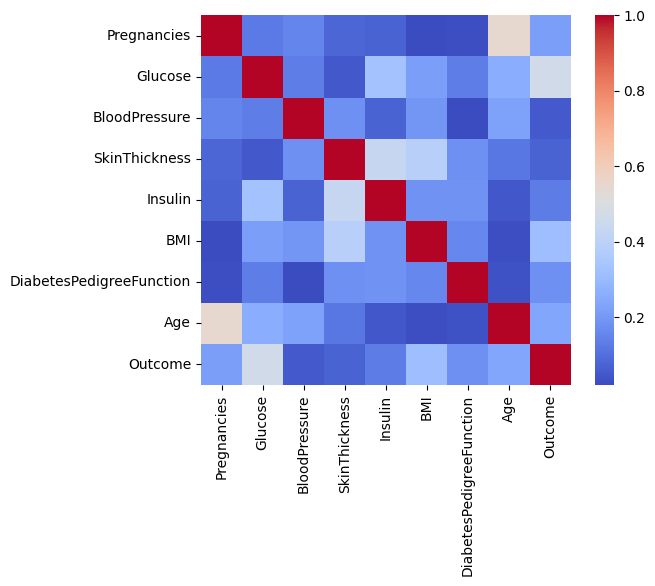

In [89]:
sns.heatmap(np.abs(df.corr()), cmap="coolwarm", square=True)
plt.show()

In [90]:
# Correlation past ustunlarni tashlab yuboramiz
df = df.drop(["BloodPressure", "SkinThickness","Insulin",'Pregnancies'], axis=1)

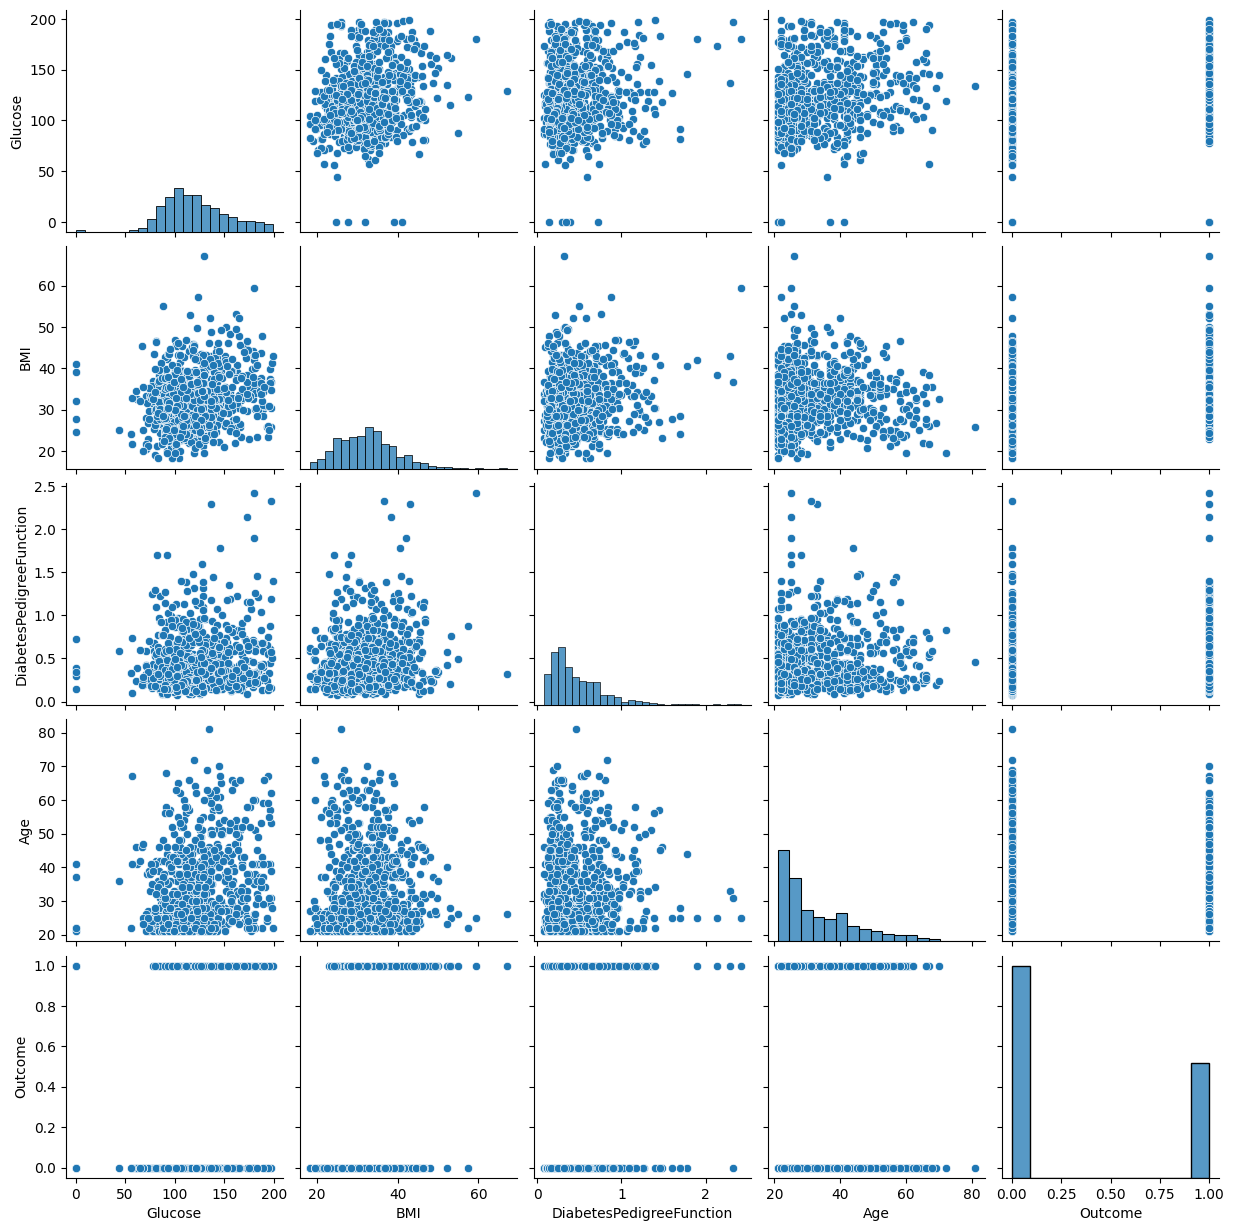

In [91]:
sns.pairplot(df)
plt.show()

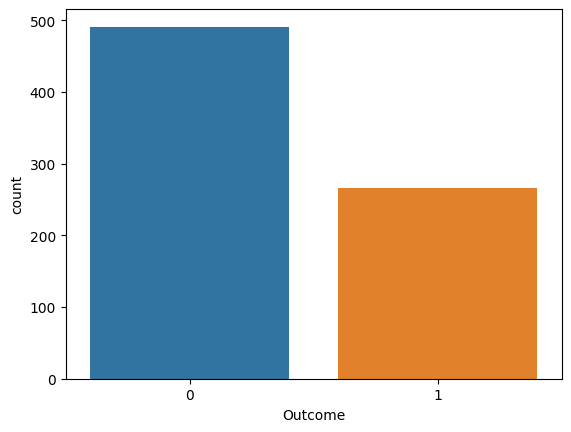

In [92]:
sns.countplot(df, x="Outcome")
plt.show()

Bizning model to'g'riroq ishlashi uchun, datasetda berilgan **label** yani **y** taqsimoti bir xil bo'lish kerak. Agar unday bo'lmasa uni tenglashtirish zarur. Lekin hoz bizda bunday imkon mavjud emas. Chunki 0 qiymatli natijalarni o'chirishimizga to'g'ri keladi. Natijada datasetimiz kichiklashib qoladi.

### datasetni **Machine Learning(ML)** ga tayyolash

In [93]:
# Malumotlarni test va train setga ajratib olamiz
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.15, random_state=42)

In [94]:
train_set

,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
460,120,20.8,0.733,48,0
216,109,35.8,0.514,25,1
578,133,27.0,0.245,36,0
433,139,25.6,0.167,29,0
766,126,30.1,0.349,47,1
...,...,...,...,...,...
74,79,32.0,0.396,22,0
110,171,33.3,0.199,24,1
275,100,40.5,0.677,25,0
442,117,33.2,0.230,24,0


In [95]:
test_set

,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
415,173,35.7,0.258,22,1
101,151,26.1,0.179,22,0
286,155,38.7,0.619,34,0
505,75,33.3,0.263,38,0
447,95,36.5,0.330,26,0
...,...,...,...,...,...
515,163,31.6,0.268,28,1
553,88,29.9,0.422,23,0
31,158,31.6,0.851,28,1
638,97,40.9,0.871,32,1


In [96]:
# datasetni o'zgaruvchilar va labelga ajratadigan funksiya
def x_y_split(dff):
  X = dff.drop("Outcome", axis=1)
  Y = dff["Outcome"]
  return X, Y

In [97]:
train_x , train_y = x_y_split(train_set)
test_x , test_y = x_y_split(test_set)

In [98]:
# Datasetni Standard qiymatlarga keltirish
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()

In [99]:
train_x = stdscaler.fit_transform(train_x)
test_x = stdscaler.fit_transform(test_x)

### ML

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
knn = KNeighborsClassifier(n_neighbors=19)


k ning qiymatini topish

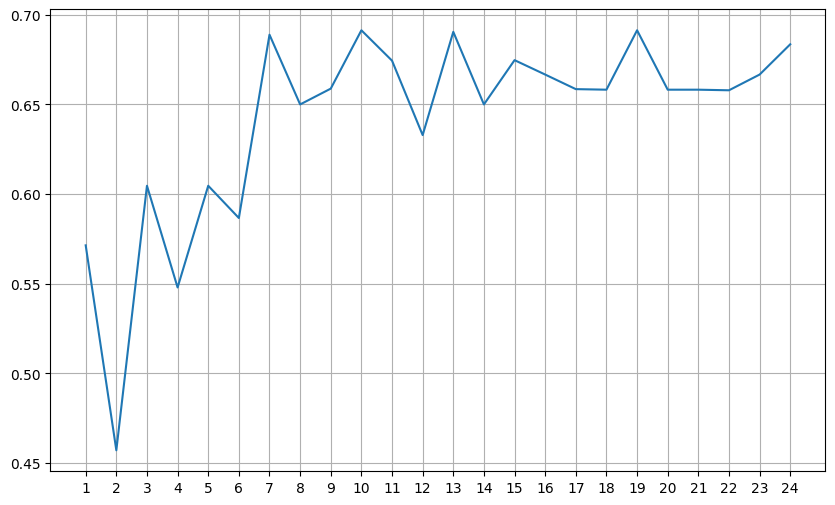

In [101]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(train_x, train_y)
    y_predict = knn.predict(test_x)
    f1.append(f1_score(test_y, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

Grid Search yordamida k ni topish

In [116]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(df.drop("Outcome", axis=1), df.Outcome)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [117]:
# k ning qiymati
knn_gscv.best_params_

{'n_neighbors': 19}

In [119]:
knn.fit(train_x, train_y)


KNeighborsClassifier(n_neighbors=19)

In [120]:
predicted_y = knn.predict(test_x)


### Modelni baholash

In [121]:
from sklearn.metrics import jaccard_score, confusion_matrix

In [122]:
# Jaccard indeksi bo'yicha. qiymat qancha katta bo'lsa model shuncha yaxshi
jaccard_score(test_y, predicted_y)

0.5283018867924528

In [123]:
# Confusion matrix yordamida
confusion_matrix(test_y, predicted_y)

array([[61,  9],
       [16, 28]])

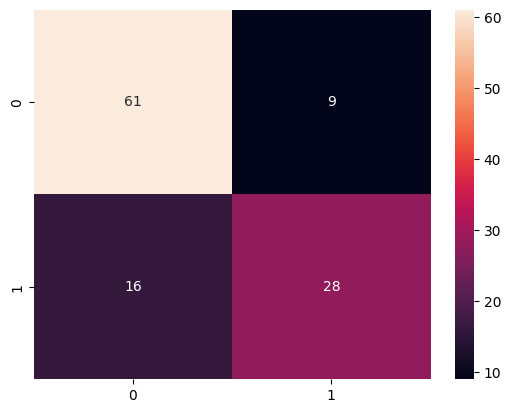

In [124]:
sns.heatmap(confusion_matrix(test_y, predicted_y), annot=True)
plt.show()

In [125]:
precision = precision_score(test_y, predicted_y)
recall = recall_score(test_y, predicted_y)
f1 = f1_score(test_y, predicted_y)
accuracy = accuracy_score(test_y, predicted_y)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.7567567567567568
recall=0.6363636363636364
f1=0.691358024691358
accuracy=0.7807017543859649


In [126]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X =df.drop("Outcome", axis=1), y = df.Outcome, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(df.Outcome, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       491
           1       0.70      0.60      0.65       266

    accuracy                           0.77       757
   macro avg       0.75      0.73      0.74       757
weighted avg       0.76      0.77      0.76       757

